In [1]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

C:\Users\kaloo\AppData\Roaming\Python\Python39\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Without air resistance, the x and y coordinates of the ball follow
$$
\begin{align}
y(t) &= v_i \sin(\theta) t - \frac{1}{2} g t^2 \\
x(t) &= v_i \cos(\theta) t
\end{align}
$$

Thus, we can express y in terms of x as such:
$$
\begin{align}
y(t) &= x \tan(\theta) - \frac{g}{2 v_i^2 \cos^2(\theta)} x^2 \\
\end{align}
$$

and the range of the projectile as
$$
d=\frac{2 v_i^2 \sin(\theta) \cos(\theta)}{g}=\frac{v_i ^2 \sin(2 \theta)}{g}
$$

The code below plots this ideal range against some parameters

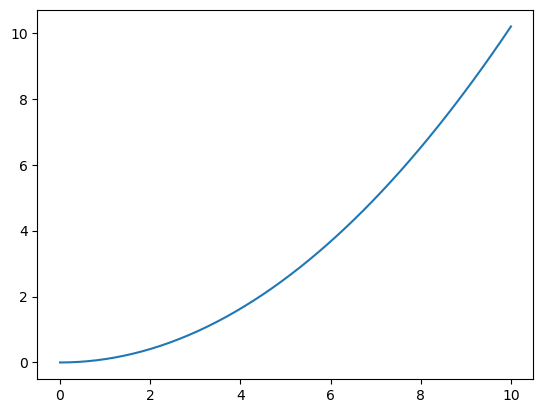

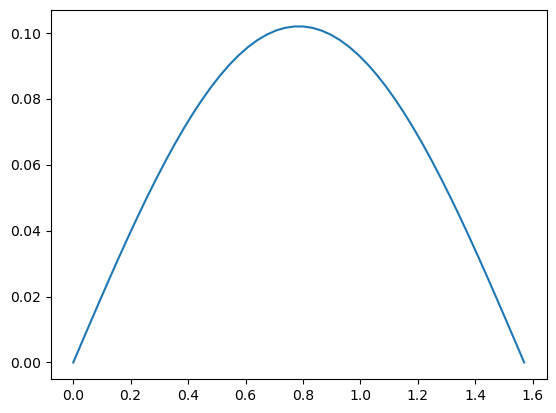

In [6]:
g = 9.81

# range against initial velocity

theta = np.pi / 4
v_values = np.linspace(0, 10, 50)
d_values = np.power(v_values, 2) * np.sin(2 * theta) / g

plt.plot(v_values, d_values)
plt.show()

# range against angle

v = 1
theta_values = np.linspace(0, np.pi / 2, 50)
d_values = np.power(v, 2) * np.sin(2 * theta_values) / g

plt.plot(theta_values, d_values)
plt.show()

With air resitance, the equation of motion (vector form) is:
$$
m\vec{a} = m\vec{g} - k|\vec{v_{rel}}|^2 \hat{v_{rel}}
$$
Where $\vec{v_{rel}}=\vec{v}-\vec{v_{wind}}$ is the relative velocity of the ball to the wind

Splitting into components and dividing by m:
$$
\begin{align}
\ddot{x} &= -\frac{k}{m} \left(\left(\dot{x}-v_{wind}\right)^2+\dot{y}^2\right) \frac{\dot{x}-v_{wind}}{\sqrt{\left(\dot{x}-v_{wind}\right)^2+\dot{y}^2}} \\
\ddot{y} &= -mg-\frac{k}{m} \left(\left(\dot{x}-v_{wind}\right)^2+\dot{y}^2\right) \frac{\dot{y}}{\sqrt{\left(\dot{x}-v_{wind}\right)^2+\dot{y}^2}}
\end{align}
$$

Note that $m$ and $k$ only appear in the form $\frac{k}{m}$, so we can redefine $k$ to be $\frac{k}{m}$:
$$
\begin{align}
\ddot{x} &= -k \left(\left(\dot{x}-v_{wind}\right)^2+\dot{y}^2\right) \frac{\dot{x}-v_{wind}}{\sqrt{\left(\dot{x}-v_{wind}\right)^2+\dot{y}^2}} \\
\ddot{y} &= -mg-k \left(\left(\dot{x}-v_{wind}\right)^2+\dot{y}^2\right) \frac{\dot{y}}{\sqrt{\left(\dot{x}-v_{wind}\right)^2+\dot{y}^2}}
\end{align}
$$

The code below solves this ODE and plots its solution

In [51]:
def projectile_launch(t, vec, k, g, v_wind):
    x, xp, y, yp = vec
    return [
        xp,
        - k * (xp - v_wind) * np.sqrt(np.power(xp - v_wind, 2) + np.power(yp, 2)),
        yp,
        - g - k * yp * np.sqrt(np.power(xp - v_wind, 2) + np.power(yp, 2))
    ]

In [62]:
k = 0.1
g = 9.81
v_wind = -10

v = 100
theta = np.pi / 4
initial_vec = [0, v * np.cos(theta), 0, v * np.sin(theta)]

# solution is stored as an array of x and y values
sol_list = [[], []]
dt = 0.001

# integrating the ode
sol = integrate.ode(projectile_launch)
sol.set_initial_value(initial_vec, 0).set_f_params(k, g, v_wind)

while sol.successful() and sol.y[2] >= 0:
    sol_list[0].append(sol.y[0])
    sol_list[1].append(sol.y[2])

    sol.integrate(sol.t + dt)

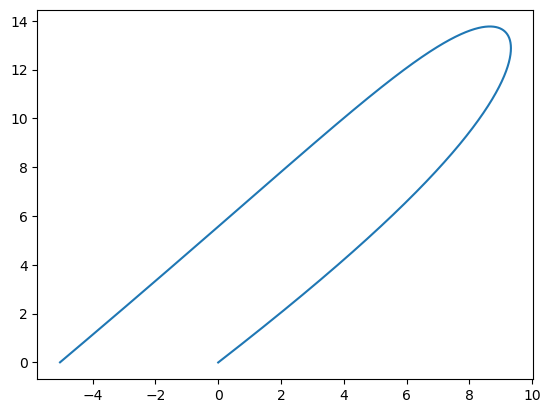

In [63]:
plt.plot(sol_list[0], sol_list[1])
plt.show()